In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# create the data 
w = 5
b = 4
X = torch.linspace(0,50, 70).reshape(-1,1)
y = w * X + b + 12 * torch.rand(size=(X.shape[0], 1))
X.shape, y.shape

(torch.Size([70, 1]), torch.Size([70, 1]))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

(torch.Size([49, 1]), torch.Size([49, 1]))

In [4]:
# plt.figure(figsize=(4,4))
# plt.plot(X_train,y_train, "k.", label="Train Data Points")
# plt.plot(X_test,y_test, "r.", label="Test Data Points")
# plt.xlabel("X")
# plt.ylabel("y")
# plt.title("X vs y")
# plt.legend()
# plt.show()

In [5]:
from torch import nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    def forward(self, x):
        return self.w * x + self.b

In [6]:
torch.manual_seed(40)
model_0 = LinearRegression()
print(model_0.state_dict())

OrderedDict({'w': tensor([0.3679]), 'b': tensor([0.8661])})


In [7]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.001)

In [8]:
epoch = 10000
for i in range(epoch):
    model_0.train()
    y_pred_train = model_0(X_train)
    loss = loss_function(y_pred_train, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    if(i % 1000 == 0):
        print(f"Epoch :: {i}/{epoch} Loss :: {loss.item():.4f}")

model_0.eval() # turn off diffrent setting in pytorch evaluation/testing/dropout/batchnorm
    

Epoch :: 0/10000 Loss :: 21068.4219
Epoch :: 1000/10000 Loss :: 19.5796
Epoch :: 2000/10000 Loss :: 14.5499
Epoch :: 3000/10000 Loss :: 12.5840
Epoch :: 4000/10000 Loss :: 11.8156
Epoch :: 5000/10000 Loss :: 11.5153
Epoch :: 6000/10000 Loss :: 11.3979
Epoch :: 7000/10000 Loss :: 11.3520
Epoch :: 8000/10000 Loss :: 11.3341
Epoch :: 9000/10000 Loss :: 11.3271


LinearRegression()

In [9]:
with torch.inference_mode():
    y_pred_test = model_0(X_test)
    loss = loss_function(y_pred_test, y_test)
    print(f"Test Loss is :: {loss.item()**(1/2):.4f}")
    y_pred_train = model_0(X_train)
    loss = loss_function(y_pred_train, y_train)
    print(f"Train Loss is :: {loss.item()**(1/2):.4f}")

Test Loss is :: 3.1170
Train Loss is :: 3.3652


In [10]:
with torch.inference_mode(): 
    y_pred_test = model_0(X_test)
    y_pred_train = model_0(X_train)


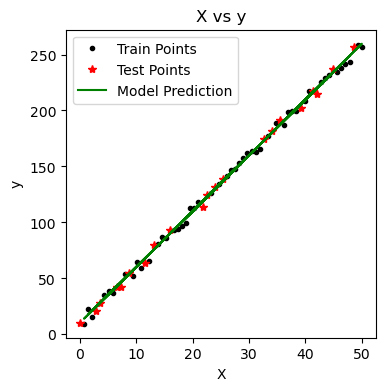

In [11]:
plt.figure(figsize=(4,4))
plt.plot(X_train,y_train, "k.", label="Train Points")
plt.plot(X_test,y_test, "r*", label="Test Points")
plt.plot(X_train,y_pred_train, "g-", label="Model Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
plt.legend()

plt.show()